<h3>Генератор равномерного распределения</h3>

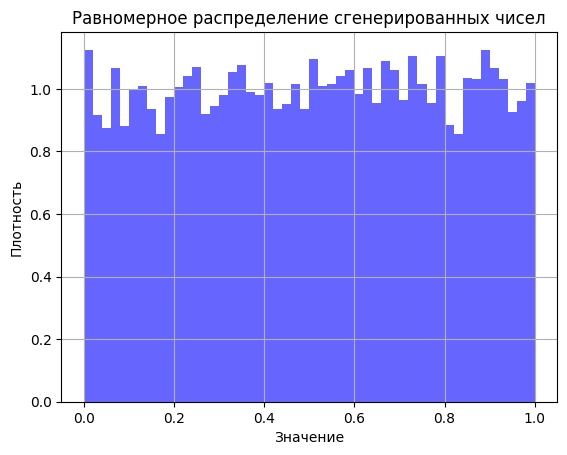

In [1]:
import matplotlib.pyplot as plt
from MersenneTwister import MersenneTwister

mt = MersenneTwister()
n = 10000

random_floats = [mt.genrand_float() for _ in range(n)]

plt.hist(random_floats, bins=50, density=True, alpha=0.6, color='b')
plt.title('Равномерное распределение сгенерированных чисел')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()


<h3>Генератор других распределений</h3>

In [2]:
from DistributionSampler import DistributionSampler
import numpy as np

mt = MersenneTwister()
sampler = DistributionSampler(mt)

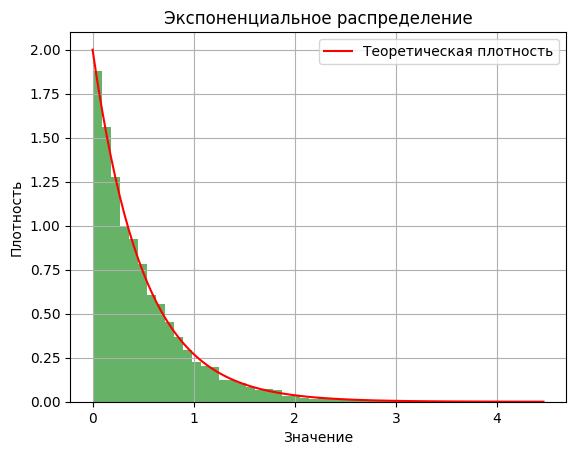

In [3]:
lambd = 2
exp_samples = [sampler.exponential(lambd) for _ in range(10000)]

plt.hist(exp_samples, bins=50, density=True, alpha=0.6, color='g')
x = np.linspace(0, max(exp_samples), 100)
plt.plot(x, lambd * np.exp(-lambd * x), 'r', label="Теоретическая плотность")
plt.legend()
plt.title("Экспоненциальное распределение")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.grid(True)
plt.show()

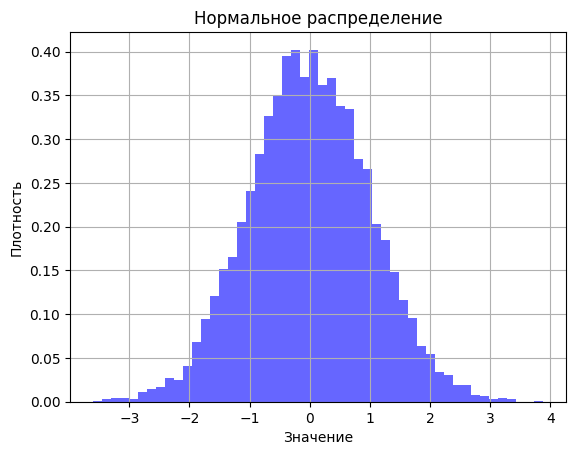

In [4]:
normal_samples = [sampler.normal() for _ in range(10000)]

plt.hist(normal_samples, bins=50, density=True, alpha=0.6, color='b')
x = np.linspace(-4, 4, 100)
plt.title("Нормальное распределение")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.grid(True)
plt.show()

<h2>Симуляция</h2>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
from collections import deque
import heapq
import random
from DistributionSampler import DistributionSampler
from MersenneTwister import MersenneTwister
from models.Library import Library
from models.Librarian import Librarian
from models.User import User

def simulate_library(num_books=3, copies_per_book=2, num_librarians=2, num_users=12, arrival_rate=1/5, librarian_mean=2, librarian_std=0.5, user_mean=30, user_std=5):
    generator = MersenneTwister()
    sampler = DistributionSampler(generator)
    library = Library(num_books=num_books, copies_per_book=copies_per_book, num_librarians=num_librarians, generator=generator, normal_mean_librarian=librarian_mean, normal_std_librarian=librarian_std)
    users = [User(i, generator, normal_mean=user_mean, normal_std=user_std) for i in range(num_users)]
    events = []
    current_time = 0

    for user in users:
        book_name = f"Book_{random.randint(0, num_books - 1)}"
        current_time += sampler.exponential(arrival_rate)
        event_time, success = library.request_book(user, book_name, current_time)
        if success:
            reading_time = user.decide_reading_time()
            heapq.heappush(events, (event_time + reading_time, user, book_name))
    
    while events:
        event_time, user, book_name = heapq.heappop(events)
        new_time, next_user = library.return_book(user, book_name, event_time)
        if next_user:
            reading_time = next_user.decide_reading_time()
            heapq.heappush(events, (new_time + reading_time, next_user, book_name))
    
    avg_wait_time = sum(library.wait_times) / len(library.wait_times)
    avg_librarian_workload = sum(l.total_service_time for l in library.librarians) / len(library.librarians)

    return avg_wait_time, library.served_users, avg_librarian_workload, current_time

avg_wait_time, served_users, avg_librarian_workload, overall_simulation_time = simulate_library()

print(f"Среднее время ожидания: {avg_wait_time:.2f} минут")
print(f"Количество обслуженных клиентов за минуту: {overall_simulation_time / served_users}")
print(f"Среднее время работы библиотекарей: {avg_librarian_workload:.2f} минут")

Среднее время ожидания: 14.97 минут
Количество обслуженных клиентов за минуту: 6.5745254889973905
Среднее время работы библиотекарей: 24.19 минут


In [6]:
import time

start_time = time.time()
N = 1_000_000
results = []

params = {
    'num_books': 5,
    'copies_per_book': 3,
    'num_librarians': 3,
    'num_users': 20,
    'arrival_rate': 1/4,  # Среднее время прибытия пользователей
    'librarian_mean': 2,  # Среднее время обслуживания пользователем
    'librarian_std': 0.5,  # Стандартное отклонение для времени обслуживания библиотекарем
    'user_mean': 30,  # Среднее время чтения пользователем
    'user_std': 5  # Стандартное отклонение для времени чтения
}

for i in range(N):
    avg_wait_time, served_users, avg_librarian_workload, overall_simulation_time = simulate_library(**params)
    results.append((avg_wait_time, served_users, avg_librarian_workload, overall_simulation_time))
    if (i % 10000 == 0):
        print(i)

end_time = time.time()
print(f"Total runtime: {end_time - start_time:.2f} seconds")


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
Total runtime: 740.47 seconds


<h2>Графики</h2>

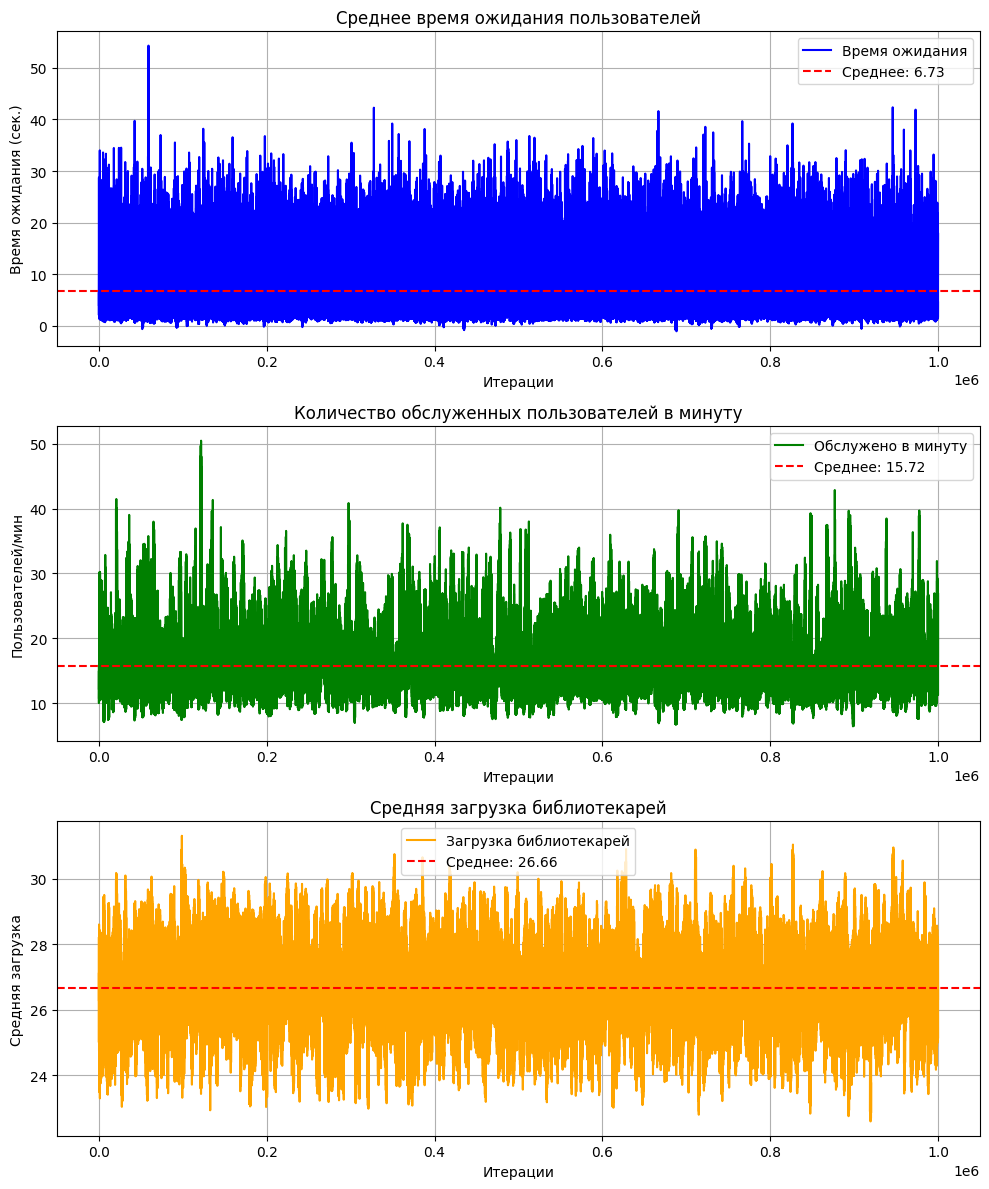

In [7]:
avg_wait_times = [result[0] for result in results]
served_users = [result[1] for result in results]
avg_librarian_workloads = [result[2] for result in results]
overall_sim_times = [result[3] for result in results]

served_users_per_minute = [users / (sim_time / 60) for users, sim_time in zip(served_users, overall_sim_times)]

mean_wait_time = np.mean(avg_wait_times)
mean_served_per_minute = np.mean(served_users_per_minute)
mean_librarian_workload = np.mean(avg_librarian_workloads)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))


axes[0].plot(avg_wait_times, color='blue', label="Время ожидания")
axes[0].axhline(mean_wait_time, color='red', linestyle="--", label=f"Среднее: {mean_wait_time:.2f}")
axes[0].set_title('Среднее время ожидания пользователей')
axes[0].set_xlabel('Итерации')
axes[0].set_ylabel('Время ожидания (сек.)')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(served_users_per_minute, color='green', label="Обслужено в минуту")
axes[1].axhline(mean_served_per_minute, color='red', linestyle="--", label=f"Среднее: {mean_served_per_minute:.2f}")
axes[1].set_title('Количество обслуженных пользователей в минуту')
axes[1].set_xlabel('Итерации')
axes[1].set_ylabel('Пользователей/мин')
axes[1].grid(True)
axes[1].legend()

axes[2].plot(avg_librarian_workloads, color='orange', label="Загрузка библиотекарей")
axes[2].axhline(mean_librarian_workload, color='red', linestyle="--", label=f"Среднее: {mean_librarian_workload:.2f}")
axes[2].set_title('Средняя загрузка библиотекарей')
axes[2].set_xlabel('Итерации')
axes[2].set_ylabel('Средняя загрузка')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()